In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore") #Ignore Warnings
pd.options.mode.chained_assignment = None #Ignore Warnings

In [3]:
DataSet_file_path="C:/Users/Preetham Koundinya/WALMART_SALES_DATA.csv"
pf=pd.read_csv(DataSet_file_path)
df=pf[['SALES','ORDERDATE']]
df.head(190)

,SALES,ORDERDATE
0,1643690.90,05-02-2010
1,1641957.44,12-02-2010
2,1611968.17,19-02-2010
3,1409727.59,26-02-2010
4,1554806.68,05-03-2010
...,...,...
185,2658725.29,26-11-2010
186,2015781.27,03-12-2010
187,2378726.55,10-12-2010
188,2609166.75,17-12-2010


In [4]:
print(df.dtypes)
print(df.shape)

SALES        float64
ORDERDATE     object
dtype: object
(6435, 2)


In [5]:
df.isnull().sum()

SALES        0
ORDERDATE    0
dtype: int64

In [6]:
df.head()

,SALES,ORDERDATE
0,1643690.90,05-02-2010
1,1641957.44,12-02-2010
2,1611968.17,19-02-2010
3,1409727.59,26-02-2010
4,1554806.68,05-03-2010


In [5]:
df.shape

(6435, 2)

# Outlier Detection by Z-score method

In [6]:
outliers=[]
def detect(df):
    threshold=3
    m=np.mean(df)
    deviation=np.std(df)
    
    for i in df:
        z_score=(i-m)/deviation
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [7]:
outliers_pt=detect(df.SALES)
outliers_pt=[*set(outliers_pt)]
l=len(outliers_pt)
outliers_pt,l

([3078162.08,
  2760346.71,
  3556766.03,
  3004702.33,
  3766687.43,
  2906233.25,
  2939946.38,
  2864170.61,
  3555371.03,
  3224369.8,
  2950198.64,
  3526713.39,
  2771646.81,
  3818686.45,
  2766400.05,
  3749057.69,
  2762816.65,
  2771397.17,
  2740057.14,
  2789469.45,
  3676388.98,
  3436007.68,
  3369068.99,
  2921709.71,
  2762861.41,
  3487986.89,
  2811634.04,
  2819193.17,
  2752122.08,
  2811646.85,
  3595903.2],
 31)

In [8]:
p=[]
n=0
for i in df.SALES:
    for j in range(l):
        k=outliers_pt[j]
        if i == k:
            p.append(n)
    n+=1
            
p=[*set(p)]
p

[523,
 526,
 527,
 1810,
 1813,
 1814,
 1957,
 1329,
 1332,
 1333,
 3764,
 189,
 2759,
 2761,
 2762,
 2763,
 471,
 474,
 475,
 1758,
 1761,
 1762,
 1381,
 1385,
 1901,
 1904,
 241,
 1905,
 2811,
 2814,
 2815]

In [9]:
for i in p:
    df=df.drop(i)
df.shape

(6404, 2)

# Graph of the data after removing the Outliers

In [10]:
df['ORDERDATE']=pd.to_datetime(df.ORDERDATE, format='%d-%m-%Y')
df.sort_values(by='ORDERDATE',inplace=True)

In [11]:
df=df.groupby('ORDERDATE').sum()

In [12]:
df=df.resample(rule='MS').sum()
df.head()

,SALES
ORDERDATE,
2010-02-01,1.903330e+08
2010-03-01,1.819198e+08
2010-04-01,2.314124e+08
2010-05-01,1.867109e+08
2010-06-01,1.922462e+08


In [13]:
df.shape

(33, 1)

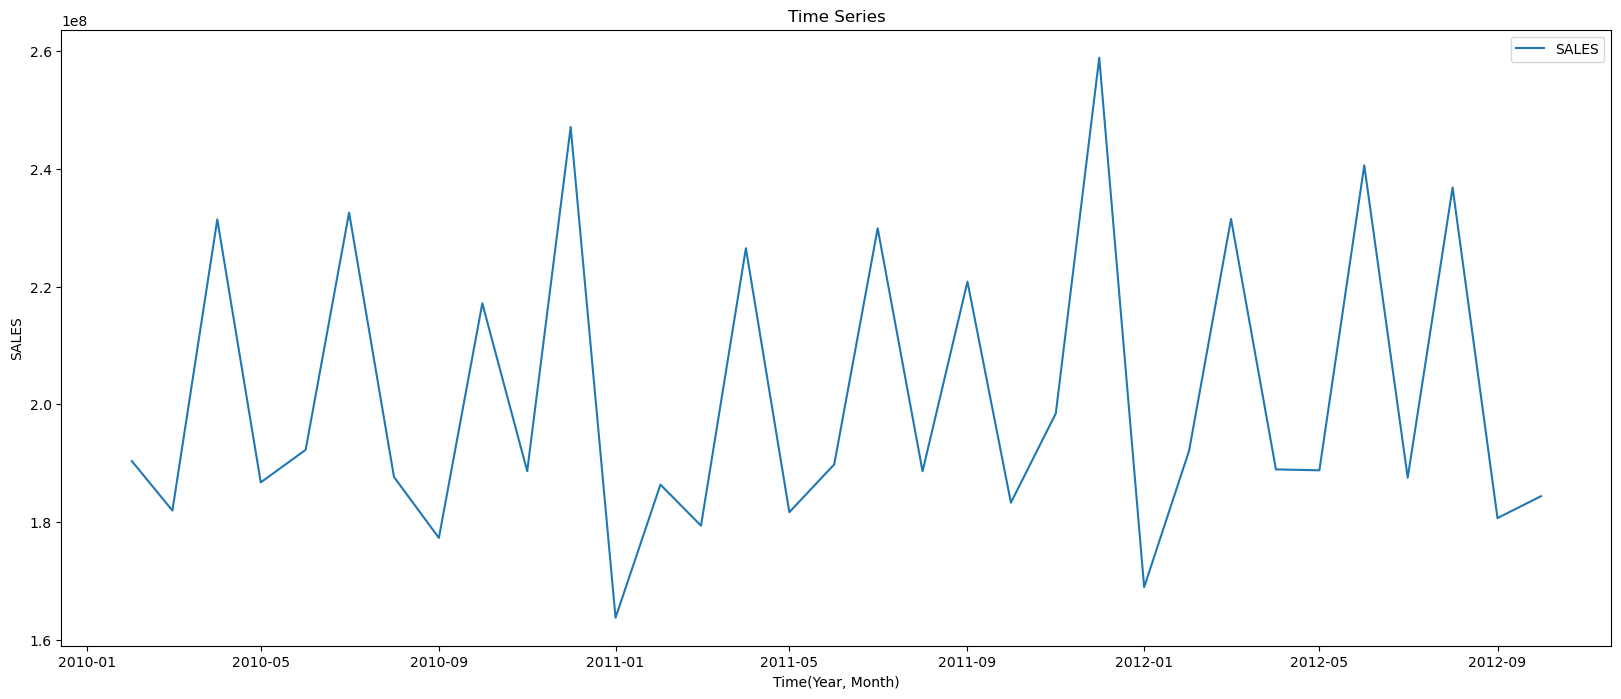

In [14]:
ts=df['SALES']
plt.figure(figsize = (20,8))
plt.plot(ts, label = 'SALES')
plt.title('Time Series')
plt.xlabel('Time(Year, Month)')
plt.ylabel("SALES")
plt.legend(loc = 'best')

In [15]:
def error_check(test,test_pred):
    return (mean_absolute_percentage_error(test,test_pred)*100)

# Modelling

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

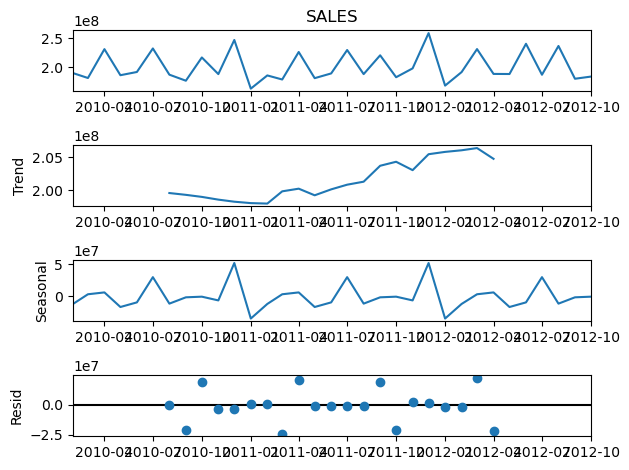

In [17]:
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()

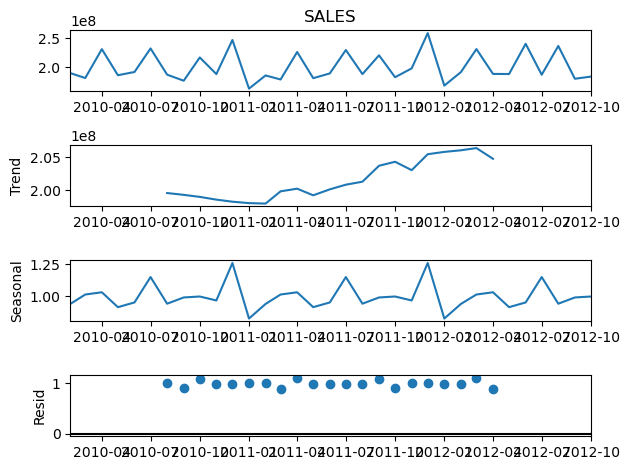

In [18]:
decomposition = sm.tsa.seasonal_decompose(ts,model='multiplicative')
fig = decomposition.plot()

# Train and test

In [19]:
train=df[:26]
test=df[26:]
print(train.tail())
test.tail()

                   SALES
ORDERDATE               
2011-11-01  1.984371e+08
2011-12-01  2.589136e+08
2012-01-01  1.688945e+08
2012-02-01  1.920636e+08
2012-03-01  2.315097e+08


,SALES
ORDERDATE,
2012-06-01,2.406103e+08
2012-07-01,1.875095e+08
2012-08-01,2.368508e+08
2012-09-01,1.806455e+08
2012-10-01,1.843617e+08


# Model Evaluation

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='ORDERDATE'>

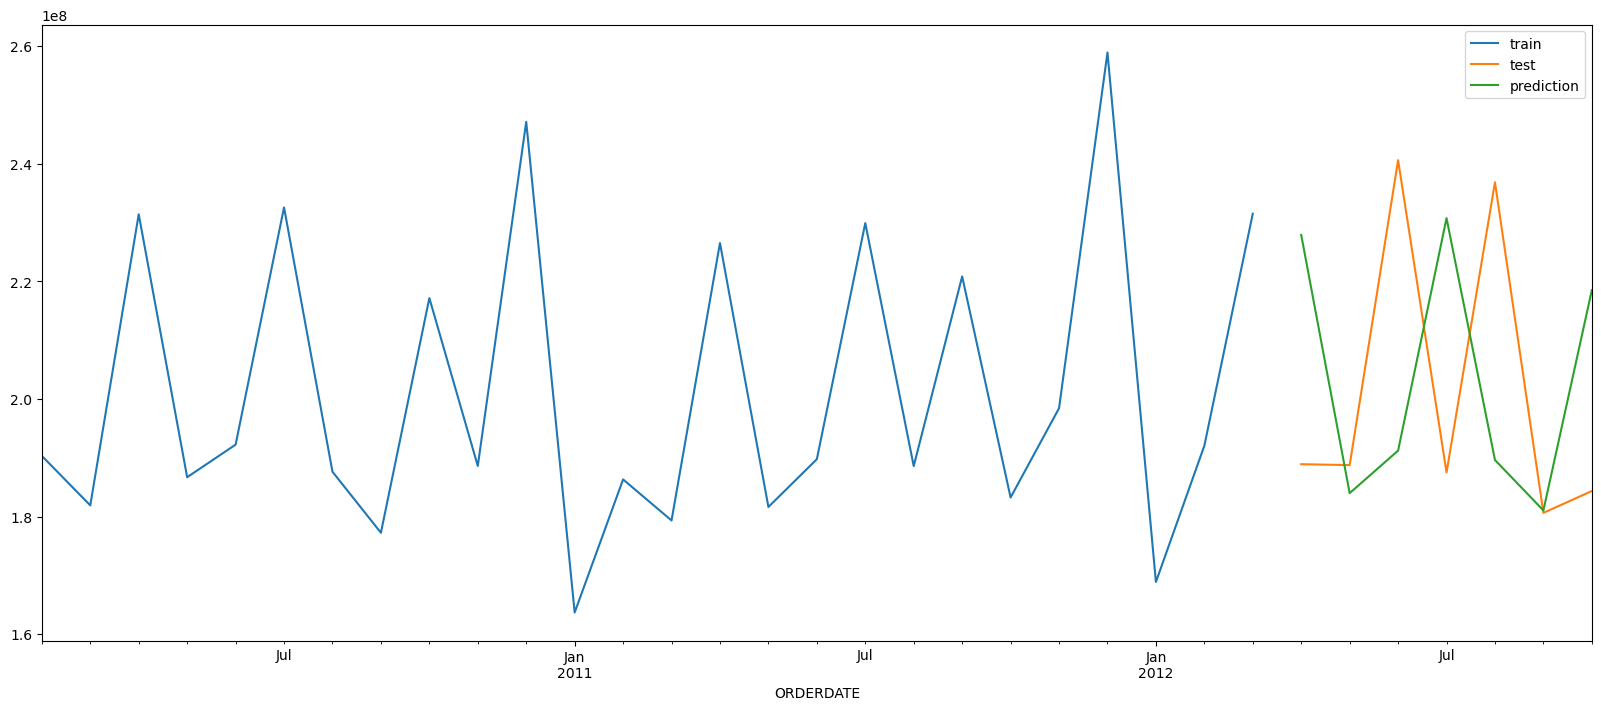

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.SALES,trend='add',seasonal='add',seasonal_periods=12).fit()
test_pred=hwmodel.forecast(7)
train['SALES'].plot(legend=True,label='train',figsize=(20,8))
test['SALES'].plot(legend=True,label='test',figsize=(20,8))
test_pred.plot(legend=True,label='prediction')

In [21]:
from sklearn.metrics import mean_squared_error
hw_error_add_MAPE=error_check(test,test_pred)
hw_error_add_MAPE                                     

15.062638698347891

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='ORDERDATE'>

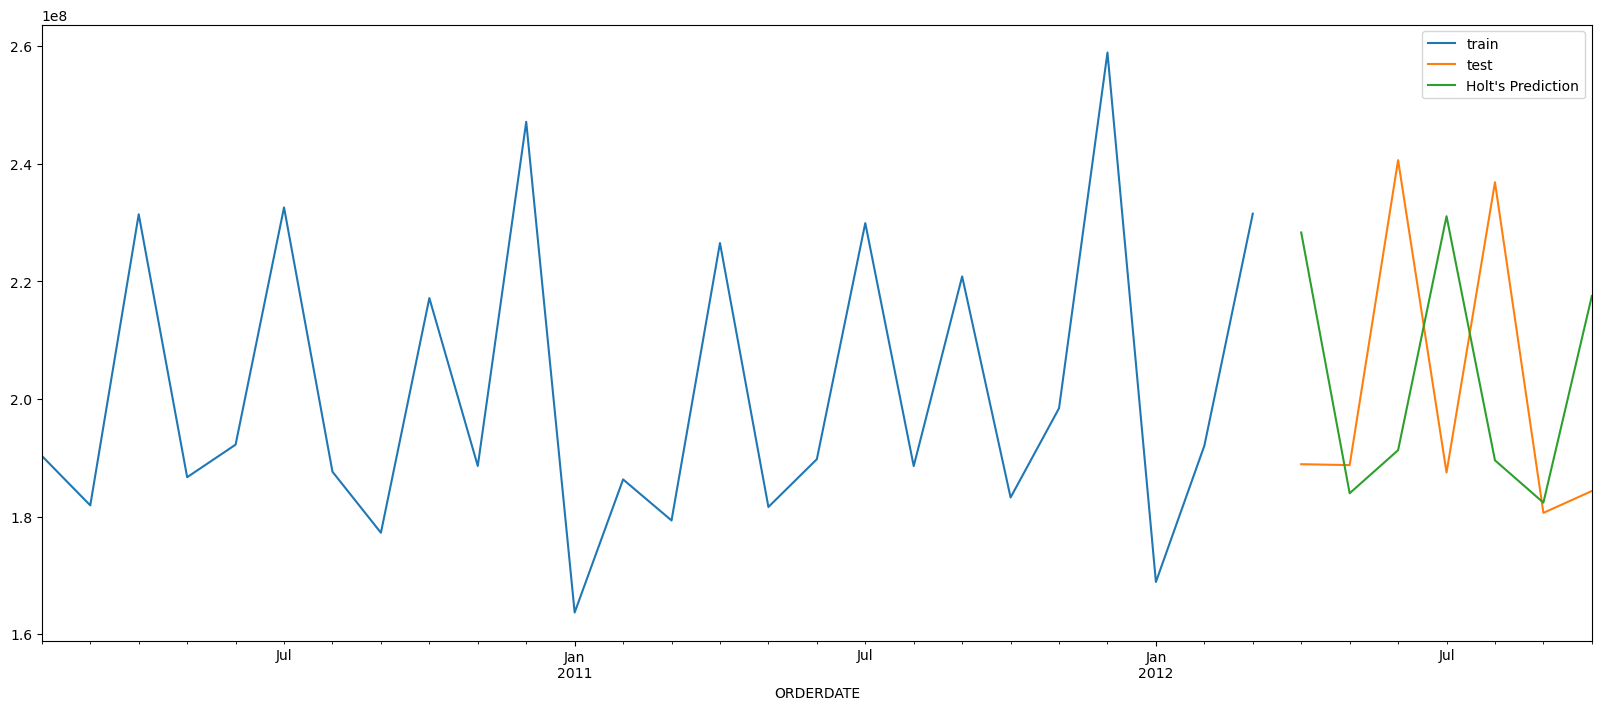

In [22]:
hwmodel1=ExponentialSmoothing(train.SALES,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_pred1=hwmodel1.forecast(7)
train['SALES'].plot(legend=True,label='train',figsize=(20,8))
test['SALES'].plot(legend=True,label='test',figsize=(20,8))
test_pred1.plot(legend=True,label="Holt's Prediction",figsize=(20,8))

In [23]:
from sklearn.metrics import mean_squared_error
hw_mul_MAPE=error_check(test,test_pred1)
hw_mul_MAPE

15.145797136029742

# Forecast for entire model with holt's winter :

In [24]:
hwmodel=ExponentialSmoothing(df.SALES,trend='add',seasonal='add',seasonal_periods=12).fit()
pred=hwmodel.forecast(7)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='ORDERDATE'>

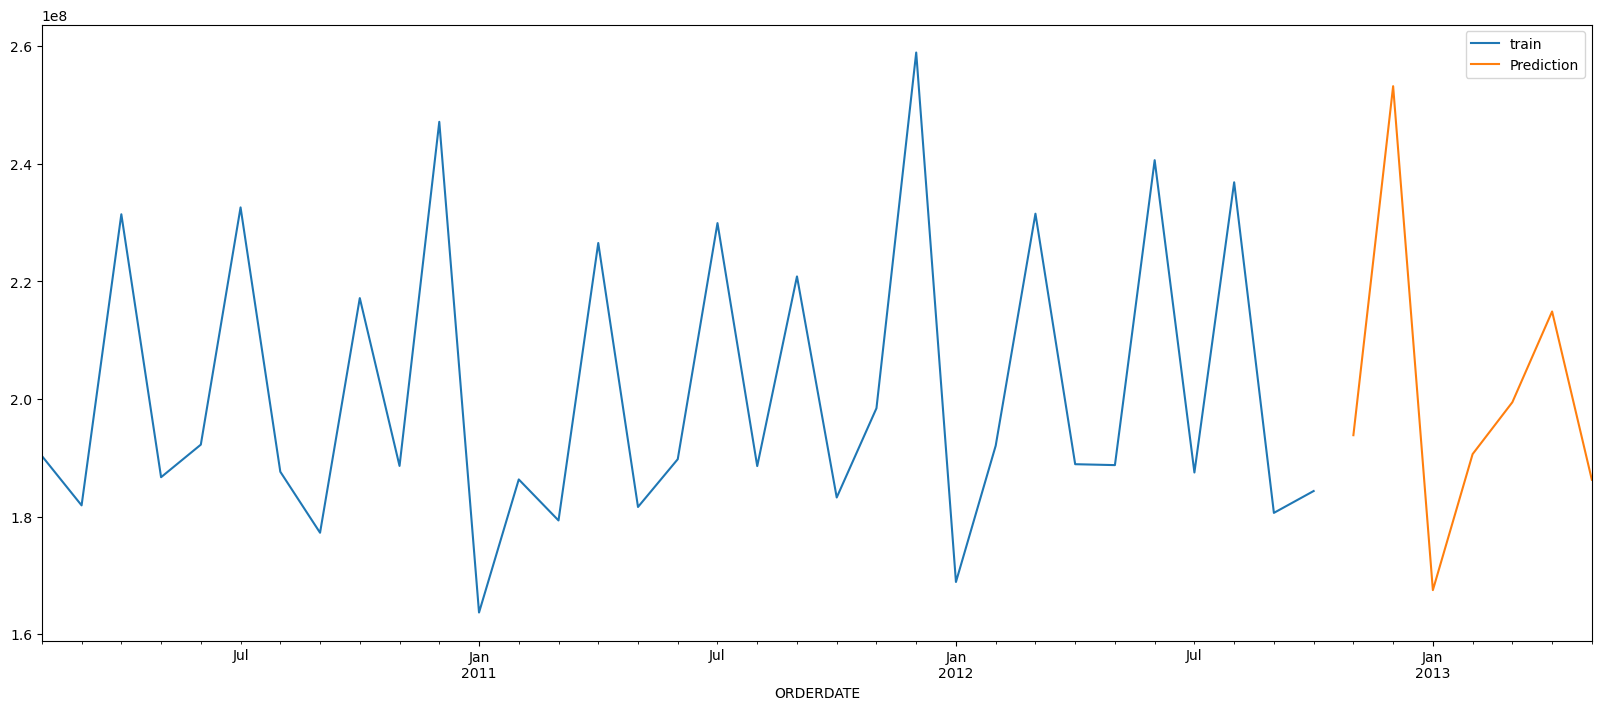

In [25]:
df['SALES'].plot(legend=True,label='train',figsize=(20,8))
pred.plot(legend=True,label='Prediction')

# Moving average

<Axes: xlabel='ORDERDATE'>

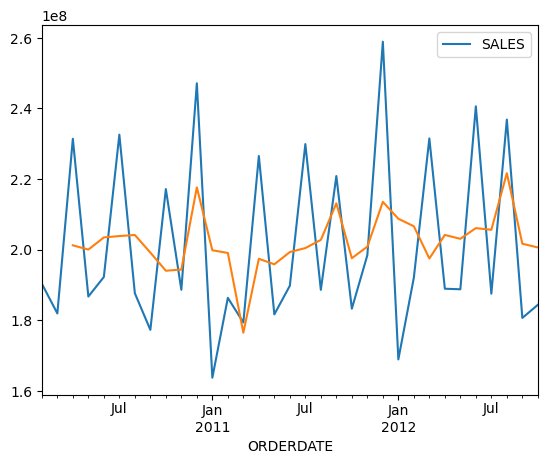

In [26]:
df.plot()
MOV = df['SALES'].rolling(window=3).mean()
MOV.plot()

In [27]:
#removing null values and checking for error
mov=MOV.iloc[3:]
p=df.iloc[3:]
mov_mape=error_check(mov,p)
mov_mape

9.682504128339227

## ARIMA

In [28]:
from statsmodels.tsa.stattools import adfuller #judges if the dataset is stationary or not

In [29]:
from statsmodels.tsa.arima.model import ARIMA

Stationarity Check:

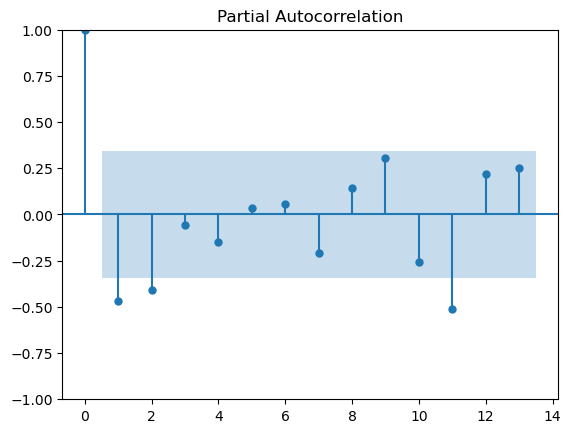

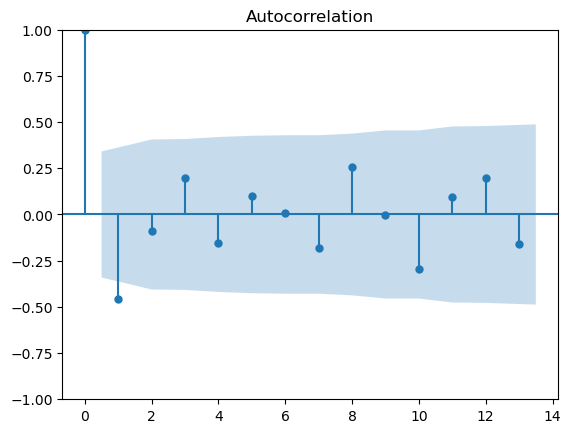

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df['SALES'],lags = 13)
acf = plot_acf(df['SALES'], lags = 13)

From above graphs we got (p,d,q) values as (1,1,0)
<br>
Should check for data if stationary or not. P - value must be <0.05 
<br>
H0(Null Hypothesis): The data is non stationary
<br>
H1(Alternate Hypothesis): The data stationary

In [31]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("ADF : ",dftest[0])
    print("P - value: ", dftest[1]) #Probability
    print("Number of lags : ", dftest[2])
    print("No. of observations used for ADF regression and Critical values calculation : ",dftest[3])
    print("Critical Values : ")
    for key,val in dftest[4].items():
        print("\t", key,":", val)

In [32]:
ad_test(df['SALES']) #Augumented Dickey-Fuller test

ADF :  -7.157927270009751
P - value:  3.020501539462408e-10
Number of lags :  1
No. of observations used for ADF regression and Critical values calculation :  31
Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [33]:
from pmdarima import auto_arima

In [34]:
stepwise_fit=auto_arima(df['SALES'],trace = True, supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1215.317, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1221.417, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1215.797, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1212.063, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1358.064, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1215.458, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1213.363, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1214.998, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1340.462, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.448 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -603.031
Date:                Wed, 06 Sep 2023   AIC                           1212.063
Time:                        15:00:07   BIC                           1216.552
Sample:                    02-01-2010   HQIC                          1213.574
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.021e+08   1.95e+06    103.424      0.000    1.98e+08    2.06e+08
ma.L1         -0.6216      0.243     -2.558      0.011      -1.098      -0.145
sigma2      5.319e+14      0.011   5.02e+16      0.000    5.32e+14    5.32e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.67   Prob(JB):                         0.29
Heteroskedasticity (H):               1.59   Skew:                             0.67
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.98e+32. Standard errors may be unstable.
"""

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
print(df.shape)
train=df.iloc[:-4]
test=df.iloc[-4:]
print(train.shape,test.shape)

(33, 1)
(29, 1) (4, 1)


Train the model

In [37]:
model = ARIMA(train['SALES'],order=(0,0,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  SALES   No. Observations:                   29
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -529.535
Date:                Wed, 06 Sep 2023   AIC                           1065.071
Time:                        15:00:08   BIC                           1069.173
Sample:                    02-01-2010   HQIC                          1066.355
                         - 06-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.018e+08   1.98e+06    102.027      0.000    1.98e+08    2.06e+08
ma.L1         -0.6560      0.272     -2.409      0.016      -1.190      -0.122
sigma2      4.673e+14      0.012   3.92e+16      0.000    4.67e+14    4.67e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 2.36
Prob(Q):                              0.59   Prob(JB):                         0.31
Heteroskedasticity (H):               2.06   Skew:                             0.70
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+32. Standard errors may be unstable.
"""

Prediction

In [38]:
start = len(train)
end = len(test) + len(train) - 1
pred = model.predict(start=start,end=end,type = 'levels') #Mentioned from which part to which part the prediction should be done
pred.index=df.index[start:end+1]
pred

ORDERDATE
2012-07-01    1.810997e+08
2012-08-01    2.017622e+08
2012-09-01    2.017622e+08
2012-10-01    2.017622e+08
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='ORDERDATE'>

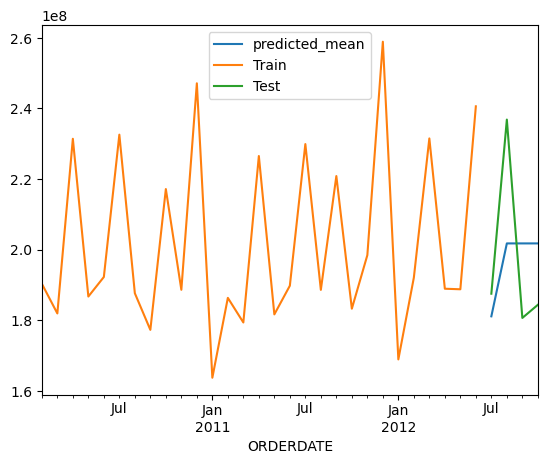

In [39]:
pred.plot(legend=True)
train['SALES'].plot(legend=True,label='Train')
test['SALES'].plot(legend=True,label='Test')

In [40]:
temp=test
arima_mape=error_check(temp,pred)
arima_mape

9.840194165835662

In [41]:
model2 = ARIMA(train['SALES'],order=(2,0,0))
model2 = model2.fit()
df.tail()

,SALES
ORDERDATE,
2012-06-01,2.406103e+08
2012-07-01,1.875095e+08
2012-08-01,2.368508e+08
2012-09-01,1.806455e+08
2012-10-01,1.843617e+08


In [42]:
pred=model2.predict(start=len(df),end=len(df)+12,type='levels').rename('ARIMA Predictions')
pred

2012-11-01    1.997851e+08
2012-12-01    2.066032e+08
2013-01-01    1.993872e+08
2013-02-01    2.010033e+08
2013-03-01    2.034690e+08
2013-04-01    2.009556e+08
2013-05-01    2.014734e+08
2013-06-01    2.023635e+08
2013-07-01    2.014887e+08
2013-08-01    2.016530e+08
2013-09-01    2.019738e+08
2013-10-01    2.016697e+08
2013-11-01    2.017212e+08
Freq: MS, Name: ARIMA Predictions, dtype: float64

<Axes: xlabel='ORDERDATE'>

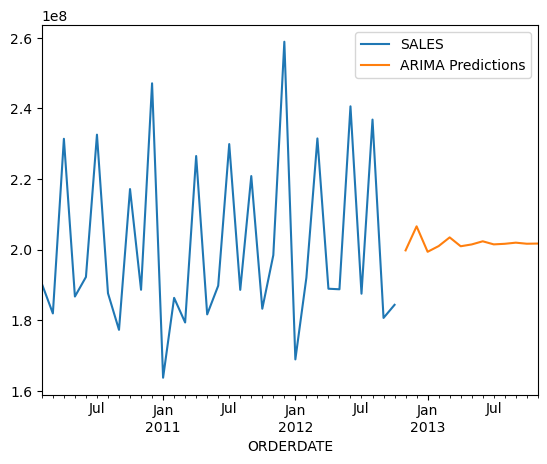

In [43]:
df.plot()
pred.plot(legend=True)

# SARIMA

In [44]:
import statsmodels.api as sm
train=df[:26]
test=df[26:]
start = len(train)
end = len(test) + len(train) -1
model = sm.tsa.statespace.SARIMAX(df['SALES'],order=(4,0,4),seasonal_order=(4,0,4,12))
results = model.fit()
pred=results.predict(start=start,end=end,dynamic=True)
pred

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ORDERDATE
2012-04-01    1.830354e+08
2012-05-01    2.106928e+08
2012-06-01    1.990967e+08
2012-07-01    1.992698e+08
2012-08-01    2.168216e+08
2012-09-01    2.007392e+08
2012-10-01    1.867627e+08
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='ORDERDATE'>

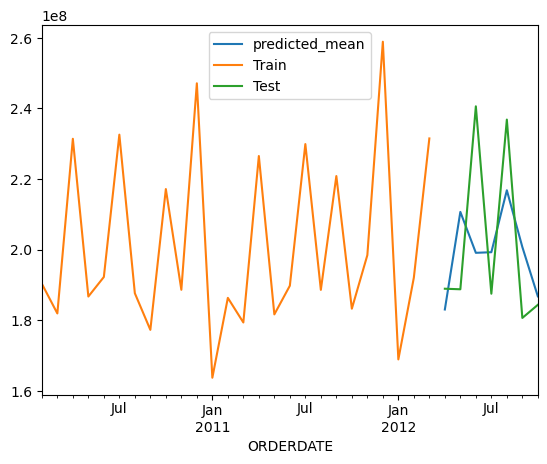

In [45]:
pred.plot(legend=True)
train['SALES'].plot(legend=True,label='Train')
test['SALES'].plot(legend=True,label='Test')

In [46]:
sarima_mape=error_check(test,pred)
sarima_mape

8.448323833152878

In [47]:
model = sm.tsa.statespace.SARIMAX(df['SALES'],order=(4,0,4),seasonal_order=(4,0,4,12))
results = model.fit()
pred=results.predict(start=len(df),end=len(df)+24,dynamic=True)
pred

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2012-11-01    2.281172e+08
2012-12-01    2.177414e+08
2013-01-01    1.797815e+08
2013-02-01    2.203897e+08
2013-03-01    1.935066e+08
2013-04-01    2.034362e+08
2013-05-01    2.142836e+08
2013-06-01    1.962408e+08
2013-07-01    2.097956e+08
2013-08-01    2.260357e+08
2013-09-01    1.810070e+08
2013-10-01    2.064564e+08
2013-11-01    2.187505e+08
2013-12-01    2.016819e+08
2014-01-01    2.056778e+08
2014-02-01    2.094513e+08
2014-03-01    1.923716e+08
2014-04-01    2.185631e+08
2014-05-01    2.018353e+08
2014-06-01    1.990722e+08
2014-07-01    2.203044e+08
2014-08-01    2.092258e+08
2014-09-01    1.896977e+08
2014-10-01    2.167429e+08
2014-11-01    2.029084e+08
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='ORDERDATE'>

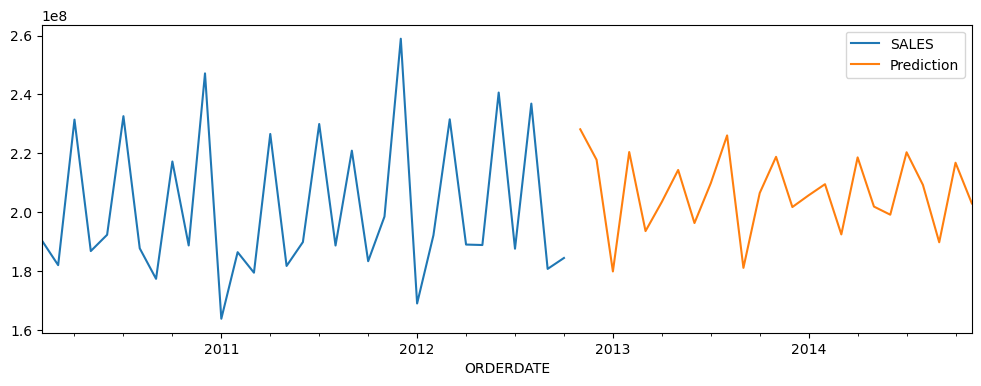

In [48]:
df['SALES'].plot(legend=True,label='SALES',figsize=(12,4))
pred.plot(legend=True,label='Prediction')

# SIMPLE LINEAR REGRESSION

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [51]:
#to make the model understand the relationship
df['Sales_last_month']=df['SALES'].shift(+1)
df['Sales_last_2months']=df['SALES'].shift(+2)
df

,SALES,Sales_last_month,Sales_last_2months
ORDERDATE,,,
2010-02-01,1.903330e+08,NaN,NaN
2010-03-01,1.819198e+08,1.903330e+08,NaN
2010-04-01,2.314124e+08,1.819198e+08,1.903330e+08
2010-05-01,1.867109e+08,2.314124e+08,1.819198e+08
2010-06-01,1.922462e+08,1.867109e+08,2.314124e+08
2010-07-01,2.325801e+08,1.922462e+08,1.867109e+08
2010-08-01,1.876401e+08,2.325801e+08,1.922462e+08
2010-09-01,1.772679e+08,1.876401e+08,2.325801e+08
2010-10-01,2.171618e+08,1.772679e+08,1.876401e+08


In [52]:
df=df.dropna()
df

,SALES,Sales_last_month,Sales_last_2months
ORDERDATE,,,
2010-04-01,2.314124e+08,1.819198e+08,1.903330e+08
2010-05-01,1.867109e+08,2.314124e+08,1.819198e+08
2010-06-01,1.922462e+08,1.867109e+08,2.314124e+08
2010-07-01,2.325801e+08,1.922462e+08,1.867109e+08
2010-08-01,1.876401e+08,2.325801e+08,1.922462e+08
2010-09-01,1.772679e+08,1.876401e+08,2.325801e+08
2010-10-01,2.171618e+08,1.772679e+08,1.876401e+08
2010-11-01,1.886242e+08,2.171618e+08,1.772679e+08
2010-12-01,2.471318e+08,1.886242e+08,2.171618e+08


In [53]:
x1,x2,y=df['Sales_last_month'],df['Sales_last_2months'],df['SALES']
x1,x2,y=np.array(x1),np.array(x2),np.array(y)
x1,x2,y=x1.reshape(-1,1),x2.reshape(-1,1),y.reshape(-1,1) #how many ever the rows under 1 column
final_x=np.concatenate((x1,x2),axis=1)
final_x

array([[1.81919802e+08, 1.90332983e+08],
       [2.31412368e+08, 1.81919802e+08],
       [1.86710934e+08, 2.31412368e+08],
       [1.92246172e+08, 1.86710934e+08],
       [2.32580126e+08, 1.92246172e+08],
       [1.87640111e+08, 2.32580126e+08],
       [1.77267896e+08, 1.87640111e+08],
       [2.17161824e+08, 1.77267896e+08],
       [1.88624211e+08, 2.17161824e+08],
       [2.47131787e+08, 1.88624211e+08],
       [1.63703967e+08, 2.47131787e+08],
       [1.86331328e+08, 1.63703967e+08],
       [1.79356448e+08, 1.86331328e+08],
       [2.26526511e+08, 1.79356448e+08],
       [1.81648158e+08, 2.26526511e+08],
       [1.89773385e+08, 1.81648158e+08],
       [2.29911399e+08, 1.89773385e+08],
       [1.88599332e+08, 2.29911399e+08],
       [2.20847738e+08, 1.88599332e+08],
       [1.83261283e+08, 2.20847738e+08],
       [1.98437050e+08, 1.83261283e+08],
       [2.58913590e+08, 1.98437050e+08],
       [1.68894472e+08, 2.58913590e+08],
       [1.92063580e+08, 1.68894472e+08],
       [2.315096

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=final_x[:-16],final_x[-16:],y[:-16],y[-16:]

In [55]:
lr.fit(X_train,y_train)

LinearRegression()

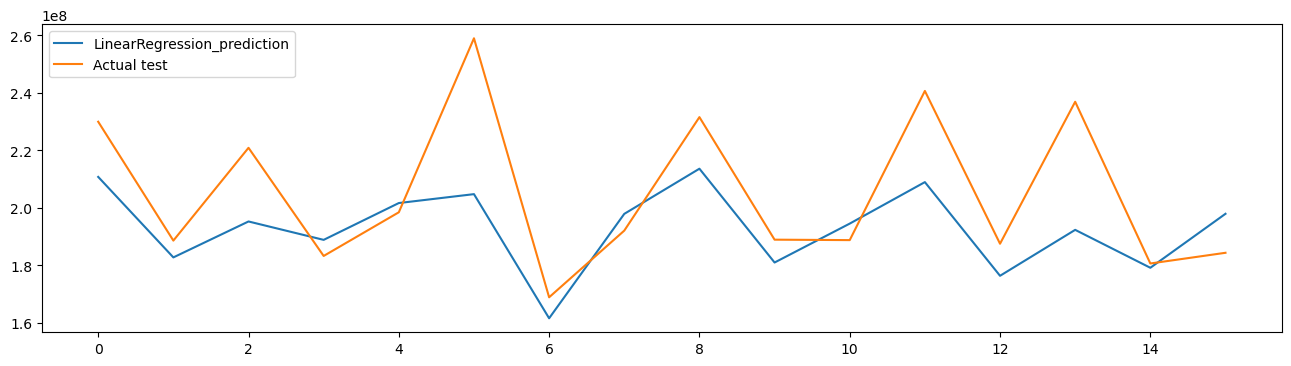

In [56]:
lr_pred=lr.predict(X_test)
plt.rcParams['figure.figsize']=(16,4)
plt.plot(lr_pred,label='LinearRegression_prediction')
plt.plot(y_test,label='Actual test')
plt.legend(loc='upper left')

ERROR CHECK

In [57]:
lr_mape=error_check(y_test,lr_pred)
lr_mape

7.315279366430383

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)
model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

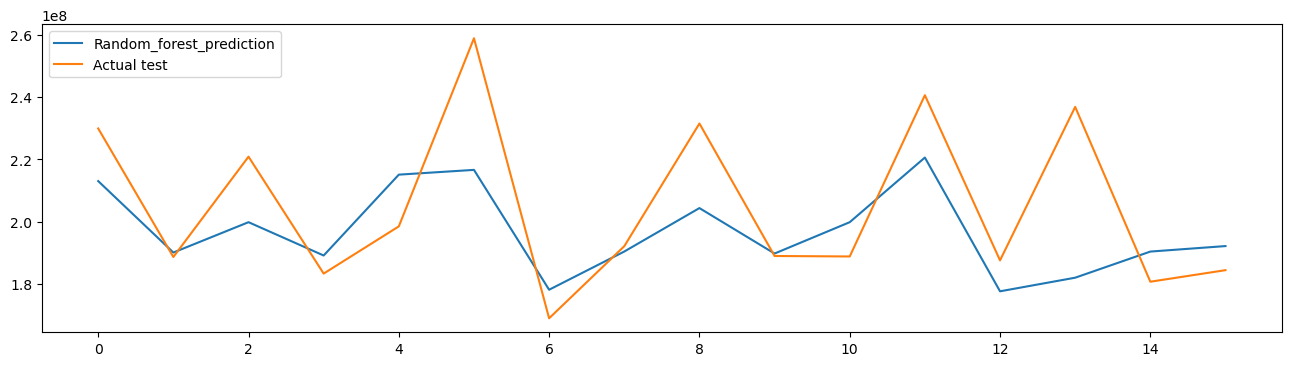

In [59]:
rf_pred=model.predict(X_test)
plt.rcParams['figure.figsize']=(16,4)
plt.plot(rf_pred,label='Random_forest_prediction')
plt.plot(y_test,label='Actual test')
plt.legend(loc='upper left')

In [60]:
rf_mape=error_check(y_test,rf_pred)
rf_mape

7.265957115217003

# Comparison Between Linear Regression and Random Forest

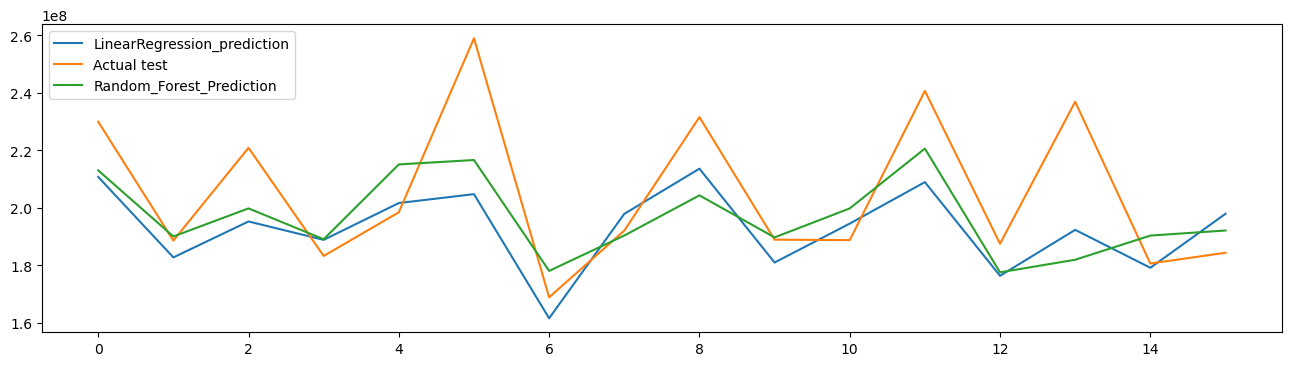

In [61]:
plt.rcParams['figure.figsize']=(16,4)
plt.plot(lr_pred,label='LinearRegression_prediction')
plt.plot(y_test,label='Actual test')
plt.plot(rf_pred,label='Random_Forest_Prediction')
plt.legend(loc='upper left')

# Overall Error Display

In [62]:
print("Holt winter Additive : ",round(hw_error_add_MAPE,2), "%\nHolt winter Multiplicative : ",round(hw_mul_MAPE,2),"%\nMoving Average :", round(mov_mape,2),"%\nARIMA : ", round(arima_mape,2), "%\nSARIMA : ",round(sarima_mape,2), "%\nLinear Regression : ", round(lr_mape,2), "%\nRandom Forest : " ,round(rf_mape,2),'%')

Holt winter Additive :  15.06 %
Holt winter Multiplicative :  15.15 %
Moving Average : 9.68 %
ARIMA :  9.84 %
SARIMA :  8.45 %
Linear Regression :  7.32 %
Random Forest :  7.27 %
